# Training linear regression on data to predict houses price provided in test.csv

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df_train = pd.read_csv("data/train.csv")

In [3]:
df_test = pd.read_csv("data/test.csv")

## Data Exploration

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.shape

(1460, 81)

In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# training missing data
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [9]:
# test missing data
missing = df_test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        15
BsmtFinType1      42
BsmtFinType2      42
BsmtQual          44
BsmtExposure      44
BsmtCond          45
GarageType        76
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
LotFrontage      227
FireplaceQu      730
MasVnrType       894
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64

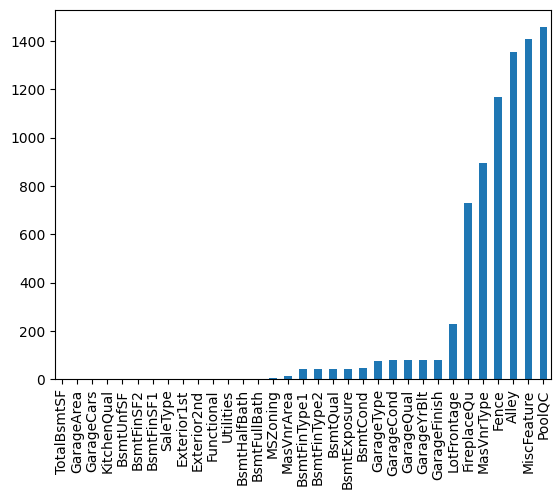

In [10]:
missing.plot.bar()
plt.show()

## Split the training data into training and validation set

In [11]:
df_train, df_validation = train_test_split(df_train, test_size= 0.3)

## Data cleaning and imputation

In [12]:
df_train["PoolQC"].value_counts()

PoolQC
Gd    3
Fa    2
Ex    1
Name: count, dtype: int64

In [13]:
# PoolQC means Pool Quality, values are :
# Ex: Excellent
# Gd: Good
# TA: Average/Typical
# Fa: Fair
# NA: No Pool
# create a mapping dictionary to map the rating into its number form
feature_mapping = {"PoolQC" : {"Ex": 4, "Gd": 3, "TA":2, "Fa":1, np.nan:0}}

In [14]:
df_train["MiscFeature"].value_counts()

MiscFeature
Shed    33
Othr     1
Gar2     1
TenC     1
Name: count, dtype: int64

In [15]:
# it has alot of missing data that cant be impute properly so its better to drop it
df_train.drop("MiscFeature", inplace=True,axis=1)
df_validation.drop("MiscFeature", inplace=True,axis=1)
df_test.drop("MiscFeature", inplace=True,axis=1)

In [16]:
df_train["Alley"].value_counts()

Alley
Grvl    33
Pave    30
Name: count, dtype: int64

In [17]:
# Alley, Type of alley access to property. values are:
# Grvl:	Gravel
# Pave:	Paved
# NA: 	No alley access
df_train["Alley"] = df_train["Alley"].fillna('No alley access')
df_validation["Alley"] = df_validation["Alley"].fillna('No alley access')
df_test["Alley"] = df_test["Alley"].fillna('No alley access')

In [18]:
df_train["Fence"].value_counts()

Fence
MnPrv    110
GdPrv     45
GdWo      38
MnWw       7
Name: count, dtype: int64

In [19]:
# Fence: Fence quality. values are: 
# GdPrv	Good Privacy
# MnPrv	Minimum Privacy
# GdWo	Good Wood
# MnWw	Minimum Wood/Wire
# NA	No Fence  
feature_mapping['Fence'] = {"GdPrv": 4, "MnPrv":3, "GdWo":2, "MnWw":1, np.nan:0}

In [20]:
df_train["FireplaceQu"].value_counts()

FireplaceQu
Gd    265
TA    217
Fa     22
Ex     18
Po     16
Name: count, dtype: int64

In [21]:
# FireplaceQu: Fireplace quality
# Ex: Excellent
# Gd: Good
# TA: Average
# Fa: Fair
# Po: Poor
# NA: No Fireplace
feature_mapping['FireplaceQu'] = {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, np.nan:0}

In [22]:
# will replace the missing value of the lotfrontage by the median of the lotfrontage values with simsimilar lotshape
lotshape_medians = (df_train.groupby("LotShape")["LotFrontage"].median())

df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotShape"].map(lotshape_medians))
df_validation["LotFrontage"] = df_validation["LotFrontage"].fillna(df_validation["LotShape"].map(lotshape_medians))
df_test["LotFrontage"] = df_test["LotFrontage"].fillna(df_test["LotShape"].map(lotshape_medians))

In [23]:
# fix the garage data

feature_mapping['GarageCond']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, np.nan:0}
feature_mapping['GarageQual']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, np.nan:0}

# NA: No Garage
# Unf Unfinished
# RFn: Rough Finished
# Fin: Finished
feature_mapping['GarageFinish']= {"Fin": 3, "RFn": 2, "Unf":1, np.nan:0}

# NA means no garage
df_train["GarageType"] = df_train["GarageType"].fillna('no garage')
df_validation["GarageType"] = df_validation["GarageType"].fillna('no garage')
df_test["GarageType"] = df_test["GarageType"].fillna('no garage')

In [24]:
df_train[df_train["GarageYrBlt"].isnull()]["GarageType"].value_counts()

GarageType
no garage    53
Name: count, dtype: int64

In [25]:
df_validation[df_validation["GarageYrBlt"].isnull()]["GarageType"].value_counts()

GarageType
no garage    28
Name: count, dtype: int64

In [26]:
df_test[df_test["GarageYrBlt"].isnull()]["GarageType"].value_counts()

GarageType
no garage    76
Detchd        2
Name: count, dtype: int64

In [27]:
df_train["GarageYrBlt"] = np.where(df_train["GarageYrBlt"].isnull(), -1, df_train["YrSold"] - df_train["GarageYrBlt"])
df_validation["GarageYrBlt"] = np.where(df_validation["GarageYrBlt"].isnull(), -1, df_validation["YrSold"] - df_validation["GarageYrBlt"])
df_test["GarageYrBlt"] = np.where(df_test["GarageYrBlt"].isnull(), -1, df_test["YrSold"] - df_test["GarageYrBlt"])

bins = [0,15,30,45,60]

df_train["GarageYrBlt"] = np.digitize(df_train["GarageYrBlt"], bins)
df_validation["GarageYrBlt"] = np.digitize(df_validation["GarageYrBlt"], bins)
df_test["GarageYrBlt"] = np.digitize(df_test["GarageYrBlt"], bins)

In [28]:
df_train["GarageYrBlt"].value_counts()

GarageYrBlt
1    376
3    202
4    166
2    121
5    104
0     53
Name: count, dtype: int64

In [29]:
# test if there is any Detchd park in catigory 0 rather than the missing 2
len(df_test[(df_test["GarageType"] == "Detchd") & (df_test["GarageYrBlt"] == 0)])

2

In [30]:
#correct the missing Detchd park by the mode of all Detchd park in the training data
mode_value = df_train[df_train["GarageType"] == "Detchd"]["GarageYrBlt"].mode()[0]
df_test.loc[(df_test["GarageType"] == "Detchd") & (df_test["GarageYrBlt"] == 0), "GarageYrBlt"] = mode_value

In [31]:
# fix the basement data

feature_mapping['BsmtQual']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, np.nan:0}
feature_mapping['BsmtCond']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, np.nan:0}

# na is No basement while no is no basement
feature_mapping['BsmtExposure']= {"Gd": 4, "Av": 3, "Mn":2, "No":1, np.nan:0}

# NA: No basement
# Unf: Unfinished
# LwQ: Low quality
# Rec: Average rec room
# BLQ: Below average living quarters
# ALQ: Average living quarters
# GLQ: Good living quarters
feature_mapping['BsmtFinType1']= {"GLQ": 6, "ALQ": 5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, np.nan:0}
feature_mapping['BsmtFinType2']= {"GLQ": 6, "ALQ": 5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, np.nan:0}

In [32]:
# for Electrical, we can use the most frequent label.
df_train['Electrical'].fillna(value=df_train['Electrical'].mode()[0], inplace=True)

In [33]:
# NA means no Maonry veneer
df_train["MasVnrType"] = df_train["MasVnrType"].fillna('no Maonry veneer')
df_validation["MasVnrType"] = df_validation["MasVnrType"].fillna('no Maonry veneer')
df_test["MasVnrType"] = df_test["MasVnrType"].fillna('no Maonry veneer')

In [34]:
#the missing areas are the one with no Maonry veneer
df_train["MasVnrArea"].fillna(value=0, inplace=True)
df_validation["MasVnrArea"].fillna(value=0, inplace=True)
df_test["MasVnrArea"].fillna(value=0, inplace=True)

In [35]:
# mapping the rating data to its numirical value using feature_mapping
df_train = df_train.replace(feature_mapping)
df_validation = df_validation.replace(feature_mapping)
df_test = df_test.replace(feature_mapping)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
389,390,60,RL,96.0,12474,Pave,No alley access,Reg,Lvl,AllPub,...,0,0,0.0,0.0,0,8,2008,New,Partial,426000
140,141,20,RL,70.0,10500,Pave,No alley access,Reg,Lvl,AllPub,...,0,0,0.0,0.0,0,4,2010,ConLI,Normal,115000
701,702,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,0,0.0,0.0,0,7,2006,COD,Normal,140000
570,571,90,RL,74.0,13101,Pave,No alley access,IR1,Lvl,AllPub,...,0,0,0.0,0.0,0,11,2008,WD,Normal,142600
674,675,20,RL,80.0,9200,Pave,No alley access,Reg,Lvl,AllPub,...,0,0,0.0,0.0,0,7,2008,WD,Normal,140000


In [36]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

Series([], dtype: int64)

### training set is imputed

In [37]:
missing = df_validation.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

Electrical    1
dtype: int64

### validation set is imputed

In [38]:
missing = df_test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
KitchenQual     1
GarageCars      1
GarageArea      1
SaleType        1
Utilities       2
BsmtFullBath    2
BsmtHalfBath    2
Functional      2
MSZoning        4
dtype: int64

In [39]:
df_train["Functional"].value_counts()

Functional
Typ     948
Min2     26
Min1     23
Maj1     12
Mod       9
Maj2      3
Sev       1
Name: count, dtype: int64

In [40]:
# usually nan will mean typical
df_test["Functional"].fillna("Typ", inplace=True)

In [41]:
df_train["Utilities"].value_counts()

Utilities
AllPub    1022
Name: count, dtype: int64

In [42]:
df_test["Utilities"].fillna("AllPub", inplace=True)

In [43]:
# impute Exterior1st
mode = df_train["Exterior1st"].mode()[0]
df_test["Exterior1st"].fillna(mode, inplace=True)
# impute Exterior2n
mode = df_train["Exterior2nd"].mode()[0]
df_test["Exterior2nd"].fillna(mode, inplace=True)
# impute KitchenQual
mode = df_train["KitchenQual"].mode()[0]
df_test["KitchenQual"].fillna(mode, inplace=True)
# impute MSZoning
mode = df_train["MSZoning"].mode()[0]
df_test["MSZoning"].fillna(mode, inplace=True)
# impute sale type
mode = df_train["SaleType"].mode()[0]
df_test["SaleType"].fillna(mode, inplace=True)
# the rest of the missing value usually mean that it doesnt contain this thing
cols = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF","GarageCars", "GarageArea", "BsmtFullBath", "BsmtHalfBath"]
df_test[cols]= df_test[cols].fillna(0)

In [44]:
missing = df_test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

Series([], dtype: int64)

### test set is imputed

## Encoding

In [45]:
x_train = df_train.drop(["SalePrice", 'Id'], axis=1)
y_train = df_train['SalePrice']
x_validation = df_validation.drop(["SalePrice", 'Id'], axis=1)
y_validation = df_validation['SalePrice']

In [46]:
enc = OneHotEncoder(handle_unknown="ignore")
x_train = enc.fit_transform(x_train)
x_validation = enc.transform(x_validation)

## scaling

In [47]:
scaler = StandardScaler(with_mean=False)
x_train = scaler.fit_transform(x_train)
x_validation = scaler.transform(x_validation)

## training a linear regression model

In [48]:
model = LinearRegression()
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## validate the model

In [49]:
# use the model to predict the training and the validation set
y_train_pred = model.predict(x_train)
y_valid_pred = model.predict(x_validation)

In [50]:
print("TRAIN PERFORMANCE")
print(f"MAE  : {mean_squared_error(y_train, y_train_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_train, y_train_pred))}")
print(f"R²   : {r2_score(y_train, y_train_pred)}")

print("\nvalidation PERFORMANCE")
print(f"MAE  : {mean_squared_error(y_validation, y_valid_pred)}")
print(f"RMSE : {np.sqrt((mean_squared_error(y_validation, y_valid_pred)))}")
print(f"R²   : {r2_score(y_validation, y_valid_pred)}")

TRAIN PERFORMANCE
MAE  : 0.2290571398507369
RMSE : 0.4785991431780221
R²   : 0.9999999999650515

validation PERFORMANCE
MAE  : 1739726853.2354681
RMSE : 41710.03300448788
R²   : 0.6955265154093628


we can see a clear sign of overfitting which is predicted since the training data is small and has alot of feature which will do poorly on linear models

## Predict the test set and save it

In [51]:
test = df_test.drop("Id", axis=1)
test = enc.transform(test)
test = scaler.transform(test)
y_predicted = model.predict(test)
df_test['SalePrice'] = y_predicted
header = ["Id", "SalePrice"]
df_test.to_csv('output.csv', columns = header, index=False)